In [1]:
import os
import glob
import matplotlib.pyplot as plt
import spec_reader
import importlib
importlib.reload(spec_reader.irradiance)
import numpy as np


In [2]:
import csv

# path = './spec_reader/spec_lib/angle_vs_sensitivity/long.csv'
# with open(path,"r") as csvfile:
#     reader = csv.reader(csvfile)
#     rawData = [np.array(list(map(float, row))) for row in reader]
# rawData_np = np.array(rawData)
# print(rawData_np)
# a =(['10,20')

# raw = np.array(list(map(float, a)))
# print(raw)
# a_np = np.array(a,dtype = np.float32)

# print(a_np)


In [3]:
# home_directory = os.environ['HOME']
# datadirectory = home_directory + '/spectrometer/SL/20200919/*/'
# measuredFiles = glob.glob(datadirectory +"3ms*")
# bgFiles = glob.glob(datadirectory +"BG_3ms*")
# cal_class = spec_reader.spec_calibration.CalibrationClass(measuredFiles,bgFiles)
# x, y = cal_class.saveCF()
# plt.scatter(x[100:],y[100:])
# plt.xlabel("waves[nm]")_
# plt.ylabel("CF")
# plt.show()

In [4]:
# home_directory = os.environ['HOME']
# datadirectory = home_directory + '/spectrometer/calibration_data/20210118/cosSp2-F1/0deg/'
# measuredFiles = glob.glob(datadirectory +"3ms*")
# bgFiles = glob.glob(datadirectory +"BG_3ms*")
# irradiance_data = spec_reader.irradiance.IrradianceClass(measuredFiles,bgFiles,angle_csv='matsumi40deg.csv')
# irradiance_data.show_wave_and_irradiance()

0.9988631487756585


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='wavelength[nm]', ylabel='Absolute Irradiance [uW/cm^2/nm]'>)

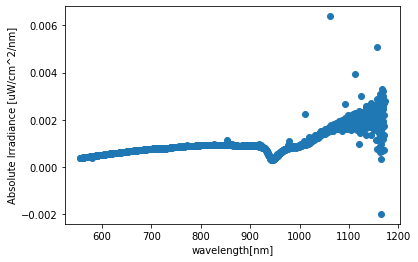

In [5]:
importlib.reload(spec_reader.spec_reader)

home_directory = os.environ['HOME']
datadirectory = home_directory + '/spectrometer/wsmr_measurement/20210528_WSMR1/'
measuredFiles = glob.glob(datadirectory +"0mm*")
bgFiles = glob.glob(datadirectory +"BG_0mm*")
irradiance_data = spec_reader.irradiance.IrradianceClass(measuredFiles,bgFiles,angle_csv='matsumi40deg.csv')
irradiance_data.show_wave_and_irradiance()


In [6]:
importlib.reload(spec_reader.spec_reader)

irradiance_book = {}

dist_np = np.array([0,50,100,150,200,250,300])
dist = ["0mm","50mm","100mm","150mm","200mm","250mm","300mm"]

home_directory = os.environ['HOME']
datadirectory = home_directory + '/spectrometer/wsmr_measurement/20210528_WSMR1/'
for d in dist:
    measuredFiles = glob.glob(datadirectory +d +"*")
    bgFiles = glob.glob(datadirectory +"BG_"+d+"*")
    irradiance_book[d]= spec_reader.irradiance.IrradianceClass(measuredFiles,bgFiles,angle_csv='matsumi40deg.csv')




[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
caliculating  0 0mm
0.9988631487756585
caliculating  1 50mm
0.9988631487756585
caliculating  2 100mm
0.9988631487756585
caliculating  3 150mm
0.9988631487756585
caliculating  4 200mm
0.9988631487756585
caliculating  5 250mm
0.9988631487756585
caliculating  6 300mm
0.9988631487756585
[0.00100637 0.00106767 0.00107825 0.00103815 0.00099915 0.00075982
 0.00066531]
[  0  50 100 150 200 250 300]


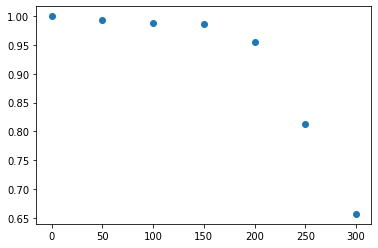

In [9]:
irradiance =np.full((len(dist),2048),np.nan)
for i,d in enumerate(dist):
    print("caliculating ",i,d)
    w,irradiance[i] =irradiance_book[d].calc_wave_and_irradiance()

irradiance = irradiance/irradiance[0]
plt.scatter(dist_np,np.average(irradiance[:,800:1400],axis=1))
